In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import pandas as pd

In [2]:
iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel() #오류가 뜨지않게 하는 코드

In [3]:
model = RandomForestClassifier(n_estimators=100, max_depth=4)

n_estimators는 랜덤포레스트모델이 결정트리를 몇 개를 만들어서

예측할건지 정해주는 파라미터이다

아무것도 설정하지않으면 기본값인 10으로 된다

In [4]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [5]:
model.predict(X_test)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [6]:
model.score(X_test, y_test)

0.9

In [7]:
importances = model.feature_importances_
importances

array([0.09681245, 0.0155955 , 0.40646022, 0.48113183])

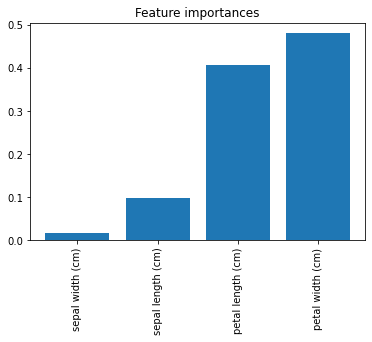

In [10]:
import numpy as np
import matplotlib.pyplot as plt
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()

# 출처: 코드잇